## Import and Prepare Data

In [1]:
import pandas as pd
data = pd.read_csv('E:/Combined VBRK.txt')

C:\Users\Tirth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.head()

,MANDT,VBELN,FKART,FKTYP,VBTYP,WAERK,BELNR,GJAHR,BUKRS,NETWR,KUNAG,FKDAT,BELNR.1,KURRF,ERDAT
0,400,1266268.0,ZF2C,L,M,INR,,0.0,BWPL,93927.0,10000008.0,20160719.0,,1.0,20160719.0
1,400,1266270.0,ZF2C,L,M,INR,,0.0,BWPL,79938.0,10000008.0,20160719.0,,1.0,20160719.0
2,400,1270953.0,ZF2C,L,M,INR,,0.0,BWPL,118851.0,10000008.0,20160927.0,,1.0,20160927.0
3,400,1271403.0,ZF2C,L,M,INR,,0.0,BWPL,114889.0,10000008.0,20161004.0,,1.0,20161004.0
4,400,1272693.0,ZF2C,L,M,INR,,0.0,BWPL,39617.0,10000008.0,20161025.0,,1.0,20161025.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191306 entries, 0 to 191305
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MANDT    191306 non-null  object 
 1   VBELN    191305 non-null  float64
 2   FKART    191305 non-null  object 
 3   FKTYP    191305 non-null  object 
 4   VBTYP    191305 non-null  object 
 5   WAERK    191305 non-null  object 
 6   BELNR    191305 non-null  object 
 7   GJAHR    191305 non-null  float64
 8   BUKRS    191305 non-null  object 
 9   NETWR    191305 non-null  float64
 10  KUNAG    191305 non-null  float64
 11  FKDAT    191305 non-null  float64
 12  BELNR.1  191305 non-null  object 
 13  KURRF    191305 non-null  float64
 14  ERDAT    191305 non-null  float64
dtypes: float64(7), object(8)
memory usage: 21.9+ MB


In [4]:
data['FKTYP'].value_counts()

L    179947
X     11358
Name: FKTYP, dtype: int64

In [5]:
data['VBTYP'].value_counts()

M       174011
U        11344
O         5691
N          247
S           12
Name: VBTYP, dtype: int64

In [4]:
data.shape

(191306, 15)

In [5]:
# AS one of the data entry is empty we can just drop it
data.dropna(inplace = True)

In [6]:
import numpy as np
# As we can see that dates have been written in float format so
# First convert dates in float to int
data['FKDAT'] = data['FKDAT'].apply(np.int64)
data['ERDAT'] = data['ERDAT'].apply(np.int64)

In [7]:
# Then convert it into Date format
data['FKDAT'] = pd.to_datetime(data['FKDAT'], format='%Y%m%d')
data['ERDAT'] = pd.to_datetime(data['ERDAT'], format = '%Y%m%d')

In [8]:
data.head()

,MANDT,VBELN,FKART,FKTYP,VBTYP,WAERK,BELNR,GJAHR,BUKRS,NETWR,KUNAG,FKDAT,BELNR.1,KURRF,ERDAT
0,400,1266268.0,ZF2C,L,M,INR,,0.0,BWPL,93927.0,10000008.0,2016-07-19,,1.0,2016-07-19
1,400,1266270.0,ZF2C,L,M,INR,,0.0,BWPL,79938.0,10000008.0,2016-07-19,,1.0,2016-07-19
2,400,1270953.0,ZF2C,L,M,INR,,0.0,BWPL,118851.0,10000008.0,2016-09-27,,1.0,2016-09-27
3,400,1271403.0,ZF2C,L,M,INR,,0.0,BWPL,114889.0,10000008.0,2016-10-04,,1.0,2016-10-04
4,400,1272693.0,ZF2C,L,M,INR,,0.0,BWPL,39617.0,10000008.0,2016-10-25,,1.0,2016-10-25


In [9]:
data.drop(['MANDT','VBELN','FKART','FKTYP','VBTYP','WAERK','BELNR','GJAHR','BUKRS','KUNAG','FKDAT','BELNR.1','KURRF'] , axis = 1 , inplace = True)

In [10]:
data.head()

,NETWR,ERDAT
0,93927.0,2016-07-19
1,79938.0,2016-07-19
2,118851.0,2016-09-27
3,114889.0,2016-10-04
4,39617.0,2016-10-25


In [11]:
data.columns = ['Sales' , 'Date']

In [12]:
data['Date'] = data['Date'].apply(lambda x: str(x)[:-9])  
data = data.groupby('Date')['Sales'].sum().reset_index()
data.head()

,Date,Sales
0,2016-04-01,34280332.36
1,2016-04-02,37023055.61
2,2016-04-03,29670807.11
3,2016-04-04,37379303.68
4,2016-04-05,38467620.57


In [13]:
data.set_index('Date', inplace= True)

In [14]:
data.head()

,Sales
Date,
2016-04-01,34280332.36
2016-04-02,37023055.61
2016-04-03,29670807.11
2016-04-04,37379303.68
2016-04-05,38467620.57


In [15]:
data.shape

(1707, 1)

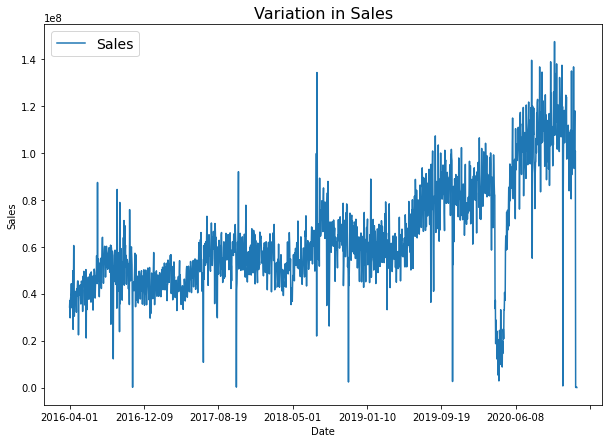

In [16]:
import matplotlib.pyplot as plt
data.plot(figsize=(10, 7))
plt.ylabel("Sales")
plt.title("Variation in Sales", fontsize=16)
plt.legend(fontsize=14);

In [91]:
timesteps = data.index.to_numpy()
sales = data["Sales"].to_numpy()
print(f'Median: {np.median(sales)}\n , Mean: {np.mean(sales)}\n , Minimum: {np.min(sales)}\n , Maximum: {np.max(sales)}')

timesteps[:10] , sales[:10]

Median: 59391313.75
 , Mean: 64447808.132337436
 , Minimum: 222.42
 , Maximum: 147298173.63000003


(array(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
        '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
        '2016-04-09', '2016-04-10'], dtype=object),
 array([34280332.36      , 37023055.61000001, 29670807.11000001,
        37379303.68000002, 38467620.57000001, 40662244.92000001,
        44213369.21999999, 38964840.52000001, 41075477.17      ,
        33822838.43000001]))

In [18]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(sales)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], sales[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], sales[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1365, 342, 1365, 342)

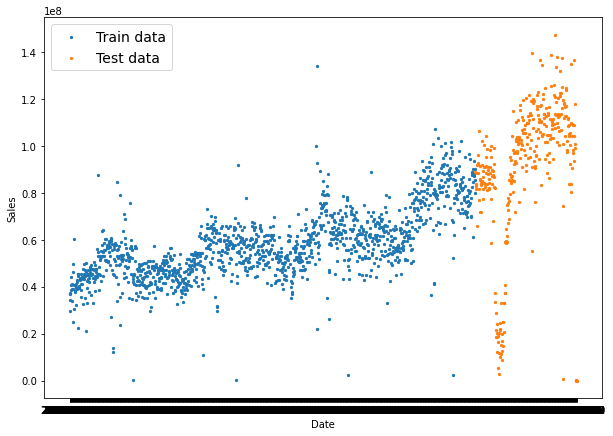

In [19]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(fontsize=14)
plt.show();

In [20]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

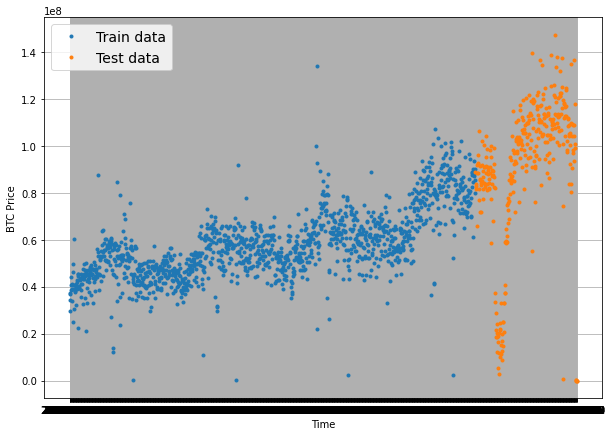

In [21]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Baseline Model

In [22]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([88615400.63000005, 81642347.27000001, 83784508.50999999,
        82807271.27000001, 65802552.01999998, 91628597.28999996,
        88327820.33      , 92021175.15000004, 88327468.63000001,
        95837813.14      ]),
 array([1.04073049e+08, 9.32842302e+07, 1.08757608e+08, 1.17842532e+08,
        9.91903271e+07, 1.00629499e+08, 8.90358300e+04, 7.00410000e+02,
        1.64301030e+05, 6.68270000e+02]))

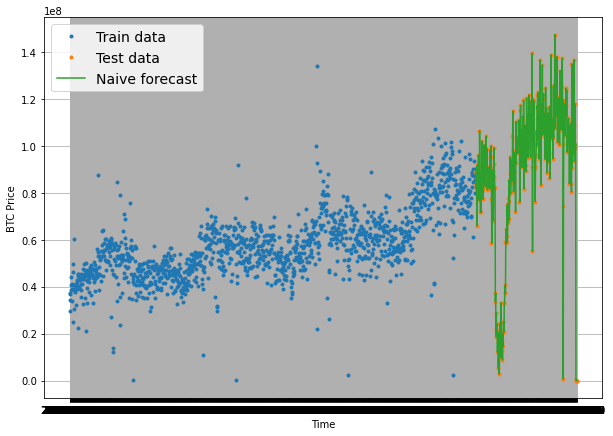

In [23]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

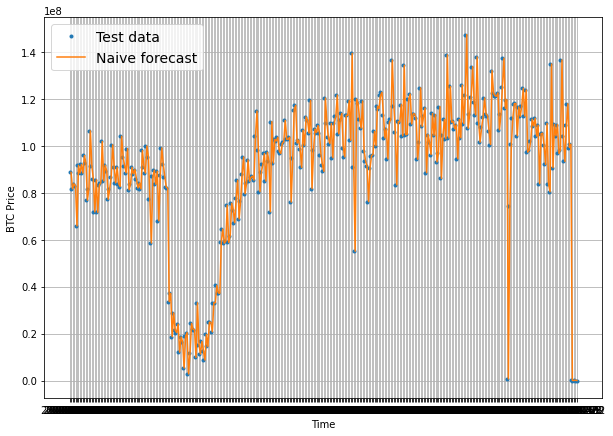

In [24]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [25]:
# Let's get TensorFlow! 
import tensorflow as tf

# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season

In [26]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
  
    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [27]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 11609588.0,
 'mse': 302290440000000.0,
 'rmse': 17386502.0,
 'mape': 509.71198,
 'mase': 0.9988268}

In [28]:
# Find average sales value in test dataset
tf.reduce_mean(y_test).numpy()

90416299.88286549

## Model - 1 (horizon - 1 , window - 7)

In [29]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [30]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [31]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [32]:
full_windows, full_labels = make_windows(sales , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1700, 1700)

In [33]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [34280332.36       37023055.61000001 29670807.11000001 37379303.68000002
 38467620.57000001 40662244.92000001 44213369.21999999] -> Label: [38964840.52000001]
Window: [37023055.61000001 29670807.11000001 37379303.68000002 38467620.57000001
 40662244.92000001 44213369.21999999 38964840.52000001] -> Label: [41075477.17]
Window: [29670807.11000001 37379303.68000002 38467620.57000001 40662244.92000001
 44213369.21999999 38964840.52000001 41075477.17      ] -> Label: [33822838.43000001]


In [34]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [35]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1360, 340, 1360, 340)

In [36]:
train_windows[:5], train_labels[:5]

(array([[34280332.36      , 37023055.61000001, 29670807.11000001,
         37379303.68000002, 38467620.57000001, 40662244.92000001,
         44213369.21999999],
        [37023055.61000001, 29670807.11000001, 37379303.68000002,
         38467620.57000001, 40662244.92000001, 44213369.21999999,
         38964840.52000001],
        [29670807.11000001, 37379303.68000002, 38467620.57000001,
         40662244.92000001, 44213369.21999999, 38964840.52000001,
         41075477.17      ],
        [37379303.68000002, 38467620.57000001, 40662244.92000001,
         44213369.21999999, 38964840.52000001, 41075477.17      ,
         33822838.43000001],
        [38467620.57000001, 40662244.92000001, 44213369.21999999,
         38964840.52000001, 41075477.17      , 33822838.43000001,
         38918998.34      ]]),
 array([[38964840.52000001],
        [41075477.17      ],
        [33822838.43000001],
        [38918998.34      ],
        [49739544.85999999]]))

In [37]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
11/11 [==============================] - 1s 55ms/step - loss: 20018080.0000 - mae: 20018080.0000 - val_loss: 11021705.0000 - val_mae: 11021705.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 8576014.0000 - mae: 8576014.0000 - val_loss: 11852544.0000 - val_mae: 11852544.0000
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 6713778.5000 - mae: 6713778.5000 - val_loss: 11352870.0000 - val_mae: 11352870.0000
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 6363815.0000 - mae: 6363815.0000 - val_loss: 11281315.0000 - val_mae: 11281315.0000
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 6333457.5000 - mae: 6333457.5000 - val_loss: 10726254.0000 - val_mae: 10726254.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 6/100
11/11 [==============================] - 0s 5ms/step

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 97/100
11/11 [==============================] - 0s 8ms/step - loss: 5627661.0000 - mae: 5627661.0000 - val_loss: 10396407.0000 - val_mae: 10396407.0000
Epoch 98/100
11/11 [==============================] - 0s 8ms/step - loss: 5621598.5000 - mae: 5621598.5000 - val_loss: 10375597.0000 - val_mae: 10375597.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 99/100
11/11 [==============================] - 0s 6ms/step - loss: 5609357.5000 - mae: 5609357.5000 - val_loss: 10363095.0000 - val_mae: 10363095.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 100/100
11/11 [==============================] - 0s 8ms/step - loss: 5616684.5000 - mae: 5616684.5000 - val_loss: 10487411.0000 - val_mae: 10487411.0000


In [39]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 1ms/step - loss: 10487410.0000 - mae: 10487410.0000


[10487410.0, 10487410.0]

In [40]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 1ms/step - loss: 10363095.0000 - mae: 10363095.0000


[10363095.0, 10363095.0]

In [41]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [42]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(340,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([87368290., 87525580., 85115360., 79541610., 82844360., 86518120.,
        87185064., 86215660., 84980960., 81181500.], dtype=float32)>)

In [43]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 10363094.0,
 'mse': 270806880000000.0,
 'rmse': 16456211.0,
 'mape': 137670.25,
 'mase': 0.889445}

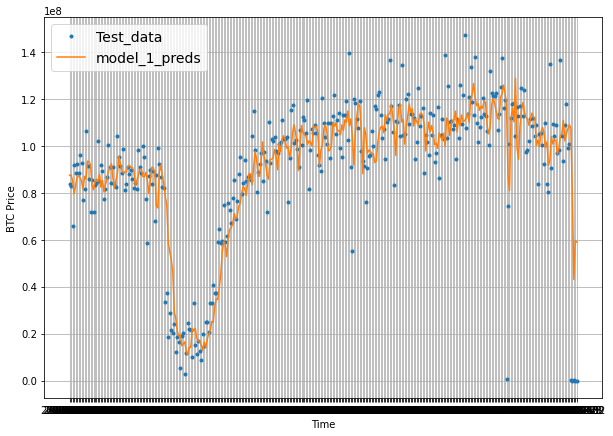

In [44]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, format="-", label="model_1_preds")

## Model - 2 (horizon - 1 , window - 30)

In [45]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [46]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(sales , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1677, 1677)

In [47]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1341, 336, 1341, 336)

In [48]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [49]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 13122528.0000


13122528.0

In [50]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 1ms/step - loss: 12645522.0000


12645522.0

In [51]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [52]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 12645523.0,
 'mse': 398023600000000.0,
 'rmse': 19950530.0,
 'mape': 165413.73,
 'mase': 1.0854818}

It looks like model_2 performs worse than the naïve model as well as model_1!

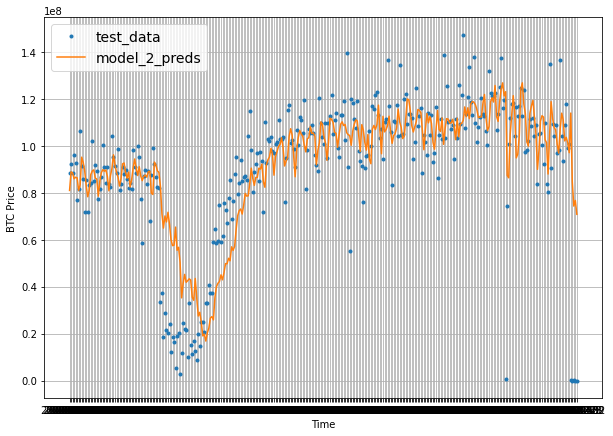

In [53]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, format="-", label="model_2_preds") 

## Model - 3(Add layers in Model - 1)

In [54]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [55]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(sales , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1700, 1700)

In [56]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1360, 340, 1360, 340)

In [57]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128 , activation = 'relu') , 
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
11/11 [==============================] - 1s 29ms/step - loss: 22738256.0000 - mae: 22738256.0000 - val_loss: 24051102.0000 - val_mae: 24051102.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 9692421.0000 - mae: 9692421.0000 - val_loss: 14506862.0000 - val_mae: 14506862.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 7519464.0000 - mae: 7519464.0000 - val_loss: 11360814.0000 - val_mae: 11360814.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 6939973.5000 - mae: 6939973.5000 - val_loss: 11336631.0000 - val_mae: 11336631.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 

Epoch 98/100
11/11 [==============================] - 0s 6ms/step - loss: 5443324.0000 - mae: 5443324.0000 - val_loss: 10659518.0000 - val_mae: 10659518.0000
Epoch 99/100
11/11 [==============================] - 0s 6ms/step - loss: 5394055.0000 - mae: 5394055.0000 - val_loss: 10673443.0000 - val_mae: 10673443.0000
Epoch 100/100
11/11 [==============================] - 0s 6ms/step - loss: 5475941.5000 - mae: 5475941.5000 - val_loss: 10957670.0000 - val_mae: 10957670.0000


In [58]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 10276920.0000 - mae: 10276920.0000


[10276920.0, 10276920.0]

In [59]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(340,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([87523710., 88349140., 85578290., 81009780., 84225384., 86152260.,
        87479820., 86698720., 85407630., 82665560.], dtype=float32)>)

In [60]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 10276920.0,
 'mse': 268048570000000.0,
 'rmse': 16372189.0,
 'mape': 120025.32,
 'mase': 0.8820489}

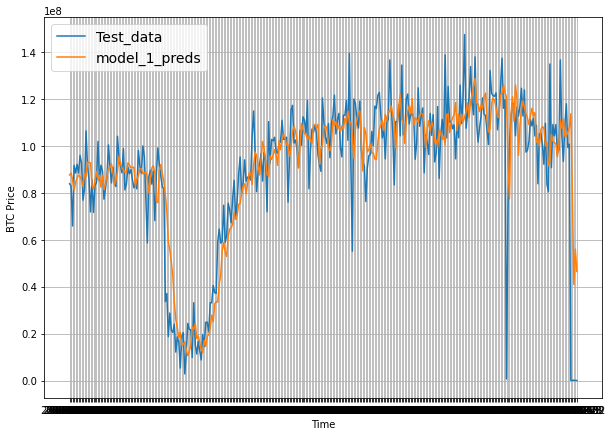

In [62]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format = '-' , label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, format="-", label="model_1_preds")

## Model - 4 (Change Activation function in Model-3)

By this layer we got to know that tanh is not performing well in this type of data

In [75]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128 , activation = 'tanh') , 
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_6_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
INFO:tensorflow:Assets written to: mod

In [76]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_6_dense/")
model_1.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 90447272.0000 - mae: 90447272.0000


[90447272.0, 90447272.0]

In [77]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(340,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([133.74341, 134.328  , 134.29108, 134.328  , 132.83575, 133.74341,
        132.07666, 130.9935 , 132.63602, 133.32547], dtype=float32)>)

In [78]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 90447270.0,
 'mse': 9144711000000000.0,
 'rmse': 95627980.0,
 'mape': 99.80483,
 'mase': 7.762921}

## Model - 5 (Add layer in Model - 3)

In [79]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128 , activation = 'relu') , 
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_6_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
11/11 [==============================] - 1s 37ms/step - loss: 22866630.0000 - mae: 22866630.0000 - val_loss: 15253134.0000 - val_mae: 15253134.0000
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 8006279.0000 - mae: 8006279.0000 - val_loss: 11777283.0000 - val_mae: 11777283.0000
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 6841405.0000 - mae: 6841405.0000 - val_loss: 11283455.0000 - val_mae: 11283455.0000
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 6358811.0000 - mae: 6358811.0000 - val_loss: 10655157.0000 - val_mae: 10655157.0000
INFO:tensorflow:Assets written to: model_experiments\model_6_dense\assets
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 

In [89]:
def median_error(y_true , y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    y_new = np.abs(y_true - y_pred)
    print(y_new)
    print(np.median(y_new))
    print(len(y_new))

In [90]:
median_error(tf.squeeze(test_labels) , model_1_preds)

[8.37843760e+07 8.28071360e+07 6.58024160e+07 9.16284640e+07
 8.83276880e+07 9.20210400e+07 8.83273360e+07 9.58376880e+07
 9.26314320e+07 7.67840640e+07 8.17512800e+07 1.06299872e+08
 9.12589520e+07 8.56856800e+07 7.17928240e+07 8.54686960e+07
 7.15726880e+07 8.31046960e+07 8.42915360e+07 1.01794080e+08
 8.50469120e+07 9.16860800e+07 8.91625120e+07 7.71841440e+07
 8.17194080e+07 8.67337840e+07 1.00340128e+08 9.08872560e+07
 8.41455120e+07 9.08044400e+07 8.38697040e+07 8.25868240e+07
 1.03996656e+08 9.51898240e+07 9.14195920e+07 8.84280080e+07
 9.87369360e+07 8.11867120e+07 8.36347040e+07 9.07841600e+07
 8.80245680e+07 8.98359280e+07 8.55913200e+07 8.20006960e+07
 8.40840240e+07 8.15919120e+07 9.79415920e+07 9.10557200e+07
 8.83345920e+07 9.98794320e+07 9.52943040e+07 7.71436560e+07
 5.85270040e+07 8.68810480e+07 8.95690720e+07 8.35865840e+07
 8.90814480e+07 6.80632240e+07 8.76499680e+07 9.90397440e+07
 9.20798080e+07 8.68159200e+07 8.23161840e+07 8.18698960e+07
 3.36034480e+07 3.706710

## Model - 6 (Conv1D)

In [104]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(150 , activation = 'relu') ,
    layers.Dense(100 , activation = 'relu') , 
    layers.Dense(50 , activation = 'relu') ,
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_8_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_8_dense\assets


In [105]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_8_dense/")
model_1.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 10425920.0000 - mae: 10425920.0000


[10425920.0, 10425920.0]

In [106]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(340,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([87126590., 87681260., 84858420., 80492590., 83100824., 87108950.,
        86490440., 85317860., 84989200., 82478660.], dtype=float32)>)

In [107]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 10425919.0,
 'mse': 274872700000000.0,
 'rmse': 16579285.0,
 'mape': 132392.52,
 'mase': 0.8948372}

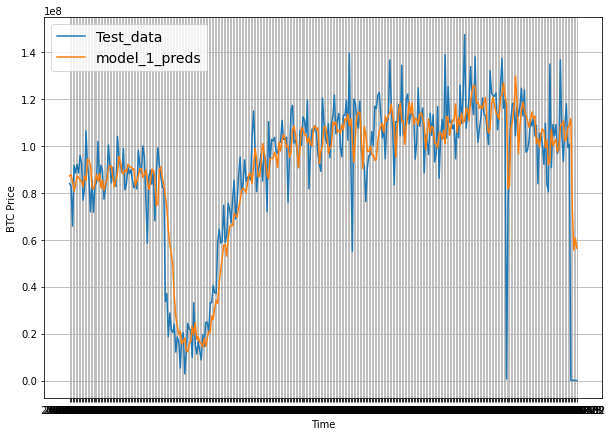

In [108]:
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format = '-' , label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, format="-", label="model_1_preds")
plot_time_series(timesteps=X_test[-len(test_windows):] , value=)

## Model-7(window = 30, horizon = 7)

In [54]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(sales , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1671, 1671)

In [55]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1336, 335, 1336, 335)

In [56]:
# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [57]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 1ms/step - loss: 13642374.0000


13642374.0

In [58]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[88961580., 86813010., 86682160., 86862050., 82595096., 82983480.,
        85755784.],
       [86182210., 82701660., 87525330., 81218350., 82194110., 84791096.,
        86765630.],
       [84256540., 85146550., 82199900., 81272300., 88690500., 87016230.,
        86286640.],
       [85548740., 79329970., 83012810., 86024200., 87229100., 84555330.,
        83260530.],
       [76072640., 78243150., 86680630., 86298750., 86496560., 81363720.,
        82917290.]], dtype=float32)>

In [59]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
    if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [60]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 13642374.0,
 'mse': 456021200000000.0,
 'rmse': 16541626.0,
 'mape': 60482.363,
 'mase': 1.1689687}

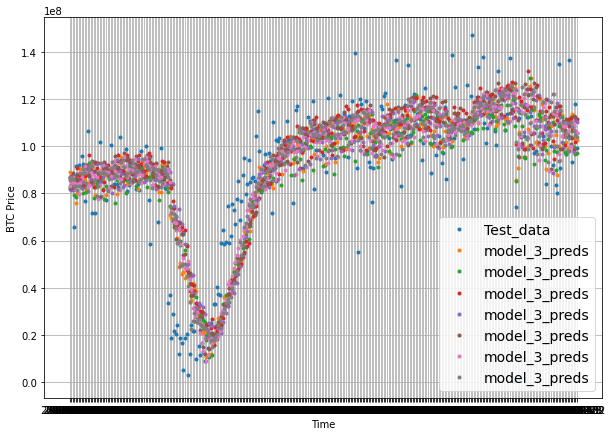

In [61]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, label="model_3_preds")

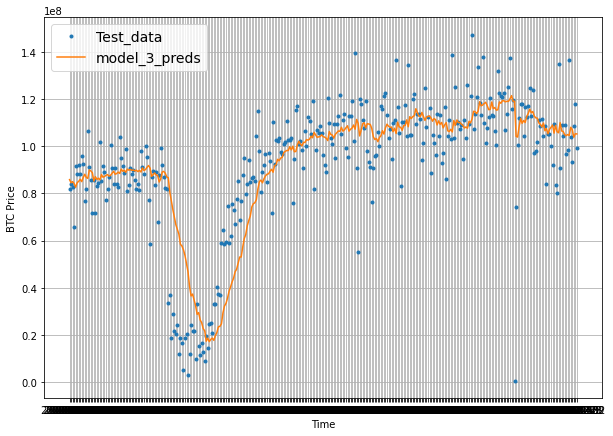

In [62]:
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 label="model_3_preds")

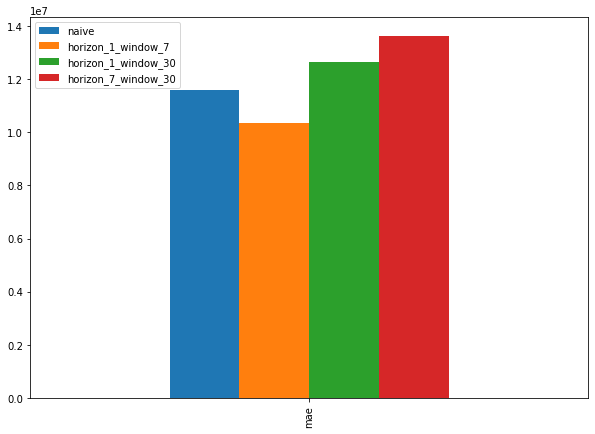

In [63]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model-8 (Conv1D)

In [64]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [65]:
# Create windowed dataset
full_windows, full_labels = make_windows(sales , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1700, 1700)

In [66]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1360, 340, 1360, 340)

In [67]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [68]:
# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


In [69]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 10533356.0000


10533356.0

In [71]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([86020200., 87316620., 84228240., 80063580., 83046000., 85606180.,
       86383890., 84620300., 86607320., 84658350.], dtype=float32)>

In [72]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 10533357.0,
 'mse': 281365200000000.0,
 'rmse': 16773944.0,
 'mape': 126473.734,
 'mase': 0.9040584}

## Model-9 (RNN - LSTM)

In [73]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
11/11 [==============================] - 3s 59ms/step - loss: 50871852.0000 - val_loss: 71425448.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 41479464.0000 - val_loss: 56903560.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 32103584.0000 - val_loss: 42587936.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 22119458.0000 - val_loss: 26508556.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 12186342.0000 - val_loss: 14311632.0000
INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets
Epoch 6/100
11/11 [==============================] - 0s 9ms/step -

In [74]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

11/11 [==============================] - 0s 2ms/step - loss: 11051621.0000


11051621.0

In [75]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([86813500., 87201790., 85080260., 81561380., 83793840., 86630460.,
       86740640., 80308080., 87804180., 80559500.], dtype=float32)>

In [76]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 11051622.0,
 'mse': 295045300000000.0,
 'rmse': 17176882.0,
 'mape': 90196.98,
 'mase': 0.9485401}

## -------------------------------------------------------------------------------------------------------------------------------

## Model - 0(Monthly Prediction)

In [78]:
data = pd.read_csv('E:/Combined VBRK.txt')

C:\Users\Tirth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [79]:
data.head()

,MANDT,VBELN,FKART,FKTYP,VBTYP,WAERK,BELNR,GJAHR,BUKRS,NETWR,KUNAG,FKDAT,BELNR.1,KURRF,ERDAT
0,400,1266268.0,ZF2C,L,M,INR,,0.0,BWPL,93927.0,10000008.0,20160719.0,,1.0,20160719.0
1,400,1266270.0,ZF2C,L,M,INR,,0.0,BWPL,79938.0,10000008.0,20160719.0,,1.0,20160719.0
2,400,1270953.0,ZF2C,L,M,INR,,0.0,BWPL,118851.0,10000008.0,20160927.0,,1.0,20160927.0
3,400,1271403.0,ZF2C,L,M,INR,,0.0,BWPL,114889.0,10000008.0,20161004.0,,1.0,20161004.0
4,400,1272693.0,ZF2C,L,M,INR,,0.0,BWPL,39617.0,10000008.0,20161025.0,,1.0,20161025.0


In [80]:
# AS one of the data entry is empty we can just drop it
data.dropna(inplace = True)

In [81]:
data['FKDAT'] = data['FKDAT'].apply(np.int64)
data['ERDAT'] = data['ERDAT'].apply(np.int64)
data['FKDAT'] = pd.to_datetime(data['FKDAT'], format='%Y%m%d')
data['ERDAT'] = pd.to_datetime(data['ERDAT'], format = '%Y%m%d')

In [82]:
data.drop(['MANDT','VBELN','FKART','FKTYP','VBTYP','WAERK','BELNR','GJAHR','BUKRS','KUNAG','FKDAT','BELNR.1','KURRF'] , axis = 1 , inplace = True)

In [83]:
data.columns = ['Sales' , 'Date']

In [84]:
data['Date'] = data['Date'].apply(lambda x: str(x)[:-12])  
data = data.groupby('Date')['Sales'].sum().reset_index()
data.head()

,Date,Sales
0,2016-04,1.194274e+09
1,2016-05,1.270143e+09
2,2016-06,1.341825e+09
3,2016-07,1.640480e+09
4,2016-08,1.586615e+09


In [85]:
data.set_index('Date', inplace= True)

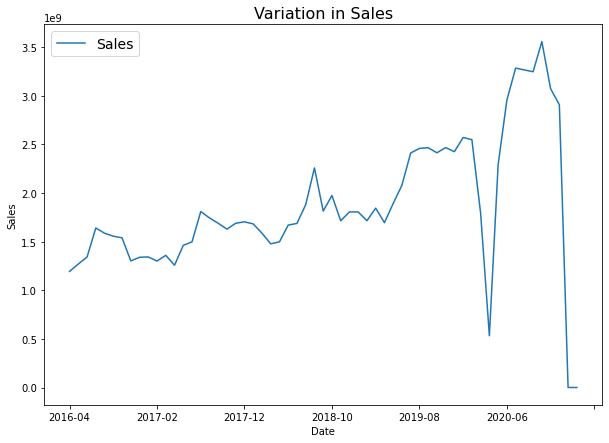

In [86]:
import matplotlib.pyplot as plt
data.plot(figsize=(10, 7))
plt.ylabel("Sales")
plt.title("Variation in Sales", fontsize=16)
plt.legend(fontsize=14);

In [87]:
timesteps = data.index.to_numpy()
sales = data["Sales"].to_numpy()

timesteps[:10] , sales[:10]

(array(['2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
        '2016-10', '2016-11', '2016-12', '2017-01'], dtype=object),
 array([1.19427382e+09, 1.27014333e+09, 1.34182493e+09, 1.64048037e+09,
        1.58661545e+09, 1.55612185e+09, 1.53958801e+09, 1.30195853e+09,
        1.33934336e+09, 1.34280714e+09]))

In [88]:
# Create train and test splits the right way for time series data

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:-12], sales[:-12]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[-12:], sales[-12:]

len(X_train), len(X_test), len(y_train), len(y_test)

(47, 12, 47, 12)

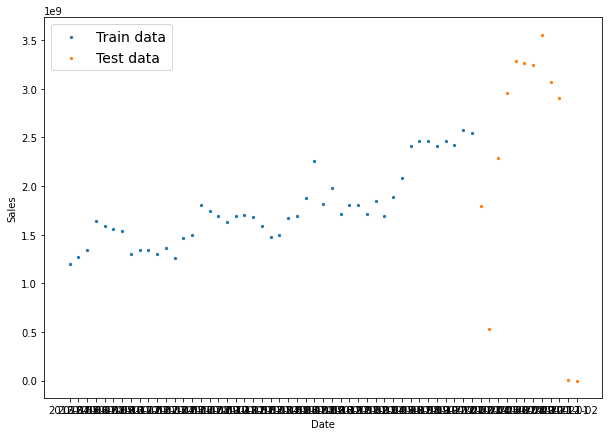

In [89]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(fontsize=14)
plt.show();

In [90]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

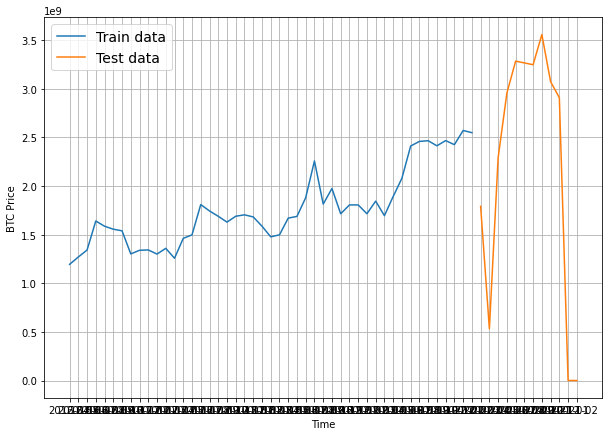

In [91]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, format = '-' , values=y_train, label="Train data")
plot_time_series(timesteps=X_test, format = '-' , values=y_test, label="Test data")

## Baseline Model

In [92]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([1.79147857e+09, 5.32260217e+08, 2.29003283e+09, 2.95544772e+09,
        3.28488035e+09, 3.26635373e+09, 3.24760905e+09, 3.55779532e+09,
        3.07349561e+09, 2.90853482e+09]),
 array([5.32260217e+08, 2.29003283e+09, 2.95544772e+09, 3.28488035e+09,
        3.26635373e+09, 3.24760905e+09, 3.55779532e+09, 3.07349561e+09,
        2.90853482e+09, 2.54705540e+05]))

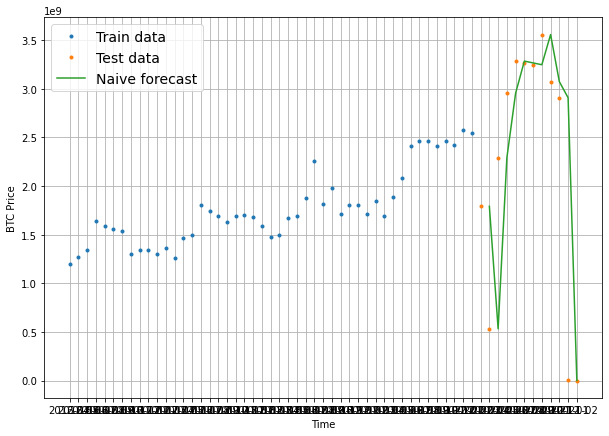

In [93]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

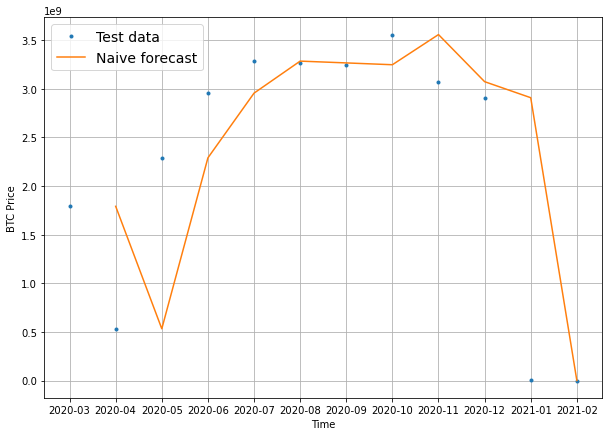

In [95]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [96]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season

In [97]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
  
    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [98]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 719735550.0,
 'mse': 1.2766781e+18,
 'rmse': 1129901800.0,
 'mape': 114237.57,
 'mase': 1.0810293}

In [99]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

2242345262.412497

## Model - 1(horizon - 1 , window - 7)

In [100]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [101]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [102]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

  # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

In [104]:
full_windows, full_labels = make_windows(sales , window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(52, 52)

In [107]:
# Make the train/test splits
def make_train_test_splits(windows, labels, split_size= -12):
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [108]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(40, 12, 40, 12)

In [109]:
train_windows[:5], train_labels[:5]

(array([[1.19427382e+09, 1.27014333e+09, 1.34182493e+09, 1.64048037e+09,
         1.58661545e+09, 1.55612185e+09, 1.53958801e+09],
        [1.27014333e+09, 1.34182493e+09, 1.64048037e+09, 1.58661545e+09,
         1.55612185e+09, 1.53958801e+09, 1.30195853e+09],
        [1.34182493e+09, 1.64048037e+09, 1.58661545e+09, 1.55612185e+09,
         1.53958801e+09, 1.30195853e+09, 1.33934336e+09],
        [1.64048037e+09, 1.58661545e+09, 1.55612185e+09, 1.53958801e+09,
         1.30195853e+09, 1.33934336e+09, 1.34280714e+09],
        [1.58661545e+09, 1.55612185e+09, 1.53958801e+09, 1.30195853e+09,
         1.33934336e+09, 1.34280714e+09, 1.30030761e+09]]),
 array([[1.30195853e+09],
        [1.33934336e+09],
        [1.34280714e+09],
        [1.30030761e+09],
        [1.35937340e+09]]))

In [111]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [112]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
1/1 [==============================] - 1s 975ms/step - loss: 1144884608.0000 - mae: 1144884608.0000 - val_loss: 1597316992.0000 - val_mae: 1597316992.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 1045754048.0000 - mae: 1045754048.0000 - val_loss: 1535162880.0000 - val_mae: 1535162880.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 946212544.0000 - mae: 946212544.0000 - val_loss: 1472902144.0000 - val_mae: 1472902144.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 846268800.0000 - mae: 846268800.0000 - val_loss: 1410299520.0000 - val_mae: 1410299520.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 5/100
1/1 [==========================

1/1 [==============================] - 0s 47ms/step - loss: 146469968.0000 - mae: 146469968.0000 - val_loss: 1064835584.0000 - val_mae: 1064835584.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 80/100
1/1 [==============================] - 0s 39ms/step - loss: 146074720.0000 - mae: 146074720.0000 - val_loss: 1063349504.0000 - val_mae: 1063349504.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 81/100
1/1 [==============================] - 0s 36ms/step - loss: 145689728.0000 - mae: 145689728.0000 - val_loss: 1061904384.0000 - val_mae: 1061904384.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 82/100
1/1 [==============================] - 0s 35ms/step - loss: 145650304.0000 - mae: 145650304.0000 - val_loss: 1060691136.0000 - val_mae: 1060691136.0000
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
Epoch 83/100
1/1 [==============================] - 0s 35

In [113]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 27ms/step - loss: 1042127552.0000 - mae: 1042127552.0000


[1042127552.0, 1042127552.0]